In [1]:
import openpyxl

# Create a new Excel workbook
workbook = openpyxl.Workbook()

# Select the active worksheet
worksheet = workbook.active

# Add some data to the worksheet
worksheet['A1'] = 'Name'
worksheet['B1'] = 'Age'
worksheet['C1'] = 'City'

worksheet['A2'] = 'John'
worksheet['B2'] = 25
worksheet['C2'] = 'New York'

worksheet['A3'] = 'Jane'
worksheet['B3'] = 30
worksheet['C3'] = 'London'

# Save the workbook
workbook.save('example.xlsx')


In [2]:
# Load the Excel file
workbook = openpyxl.load_workbook('example.xlsx')

# Select the active worksheet
worksheet = workbook.active

# Iterate over rows and columns and print the data
for row in worksheet.iter_rows():
    for cell in row:
        print(cell.value, end='\t')
    print()
workbook.close()

Name	Age	City	
John	25	New York	
Jane	30	London	


In [5]:
import openpyxl

# Load the Excel workbook
workbook = openpyxl.load_workbook(r"C:\Users\saivi\Downloads\Yoshops Survey_1786_Updated_13_March(1).xlsx")

# Select the worksheet
worksheet = workbook.active

# Set the width of column A to 20
worksheet.column_dimensions['A'].width = 20

for cell in worksheet[1]:
    cell.font = openpyxl.styles.Font(bold=True)
    cell.fill = openpyxl.styles.PatternFill(patternType='solid', fgColor='FFFF00')


# Save the changes to the workbook
workbook.save('example_formatted.xlsx')


In [4]:
workbook = openpyxl.load_workbook('excelsheet.xlsx')

# Select the active worksheet
worksheet = workbook.active

In [5]:
import re
import openpyxl
from pdfminer.high_level import extract_text
import xlsxwriter


    # compile regular expression for mobile numbers
mobile_pattern = re.compile(r'\b[6789]\d{9}\b')

    # read PDF file and extract text
text = extract_text(r"C:\Users\saivi\Downloads\mobilenumberpdf.pdf")

    # find all mobile numbers in the text
mobile_numbers = mobile_pattern.findall(text)
print(mobile_numbers)
workbook = xlsxwriter.Workbook("excelsheet.xlsx")
worksheet = workbook.add_worksheet("Mobile Numbers")
    # Write each mobile number to a cell in the worksheet
for i, number in enumerate(mobile_numbers):
    worksheet.write(i, 0, number)

['9855466636', '8956231478', '8523697411']


In [6]:
import json

path = 'C:/Users/saivi/Downloads/export (1).json'
with open(path, 'r') as f:
        data = json.load(f)
        text = json.dumps(data)
        json_input = mobile_pattern.findall(text)
print(json_input)

for i, number in enumerate(json_input):
    worksheet.write(i, 1, number)

['8916753421']


In [7]:
import xml.etree.ElementTree as ET

path_xml = r"C:\Users\saivi\Downloads\mobilenumberpdf.xml"
tree = ET.parse(path_xml)
root = tree.getroot()
text = ET.tostring(root, encoding='unicode')
xml_numbers = mobile_pattern.findall(text)

for i, number in enumerate(xml_numbers):
    worksheet.write(i, 2, number)

In [8]:
import docx
docx_numbers = []
file_path_docx = r"C:\Users\saivi\Downloads\mobilenumberpdf.docx"
doc = docx.Document(file_path_docx)

for i in doc.paragraphs:
    text = i.text
    if any(char.isdigit() for char in text):
        phone_numbers = re.findall(r'\d{10}', text)
        for number in phone_numbers:
            docx_numbers.append(number)

for i, number in enumerate(docx_numbers):
    worksheet.write(i, 3, number)

In [15]:
import pandas as pd
from openpyxl import Workbook


new_list = [mobile_numbers, xml_numbers, docx_numbers, json_input]
print(new_list)
wb = Workbook() # creates a workbook object.
ws = wb.active # creates a worksheet object.

for row in new_list:
    ws.append(row) # adds values to cells, each list is a new row.

    
wb.save('excelsheet.xlsx') # save to excel file.
print("____________________________")
for row in ws.iter_rows():
    for cell in row:
        print(cell.value, end='\t')
    print()

[['9855466636', '8956231478', '8523697411'], ['8521369874', '7412365896', '7456958199'], ['8954212365', '9523698741', '9658742150'], ['8916753421']]
____________________________
9855466636	8956231478	8523697411	
8521369874	7412365896	7456958199	
8954212365	9523698741	9658742150	
8916753421	None	None	


C:\Users\saivi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\saivi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\saivi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\saivi\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27-11-2022' in DD/MM/YYYY format. Provide format or specif

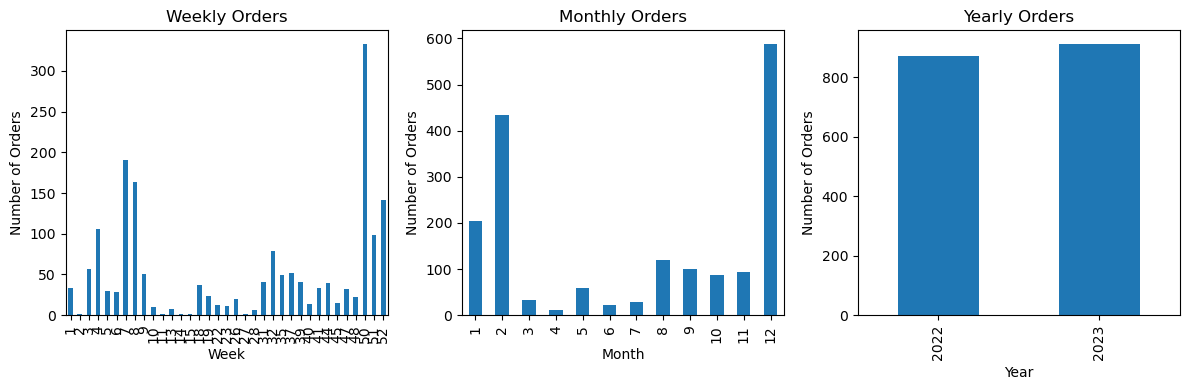

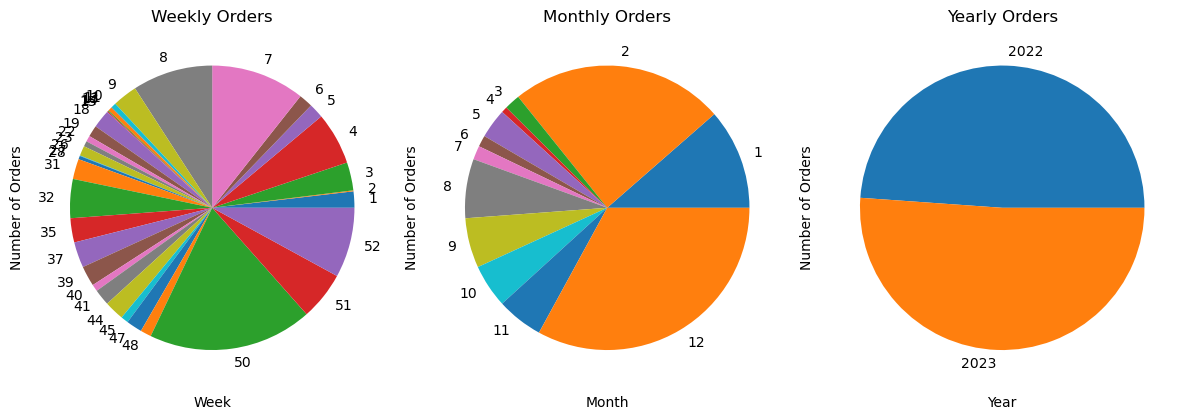

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load survey and order data from Excel file

order_data = pd.read_excel(r"C:\Users\saivi\Downloads\Yoshops Survey_1786_Updated_13_March(1).xlsx")



# Prepare order data for bar chart
order_data['Submitted Time'] = pd.to_datetime(order_data['Submitted Time'])
order_data['Week'] = order_data['Submitted Time'].dt.week
order_data['Month'] = order_data['Submitted Time'].dt.month
order_data['Year'] = order_data['Submitted Time'].dt.year
weekly_orders = order_data.groupby('Week')['S.NO'].count()
monthly_orders = order_data.groupby('Month')['S.NO'].count()
yearly_orders = order_data.groupby('Year')['S.NO'].count()

# Generate weekly, monthly, and yearly reports
plt.figure(figsize=(12, 4))

# Weekly report
plt.subplot(1, 3, 1)
weekly_orders.plot(kind='bar')
plt.title('Weekly Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

# Monthly report
plt.subplot(1, 3, 2)
monthly_orders.plot(kind='bar')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Yearly report
plt.subplot(1, 3, 3)
yearly_orders.plot(kind='bar')
plt.title('Yearly Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

# Weekly report
plt.subplot(1, 3, 1)
weekly_orders.plot(kind='pie')
plt.title('Weekly Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

# Monthly report
plt.subplot(1, 3, 2)
monthly_orders.plot(kind='pie')
plt.title('Monthly Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Yearly report
plt.subplot(1, 3, 3)
yearly_orders.plot(kind='pie')
plt.title('Yearly Orders')
plt.xlabel('Year')
plt.ylabel('Number of Orders')

plt.tight_layout()
plt.show()

In [1]:
#### data cleaning


import pandas as pd 
import numpy as np

df = pd.read_csv(r"C:\Users\saivi\Downloads\pokemon.csv")
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:
#many features are present but we need to consider only specific features wchich are effective

In [2]:
df.isna().sum().sum()

522

In [3]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():   #checking how many null values each column has
    print(column)
    print (missing_data[column].value_counts())

abilities
False    801
Name: abilities, dtype: int64
against_bug
False    801
Name: against_bug, dtype: int64
against_dark
False    801
Name: against_dark, dtype: int64
against_dragon
False    801
Name: against_dragon, dtype: int64
against_electric
False    801
Name: against_electric, dtype: int64
against_fairy
False    801
Name: against_fairy, dtype: int64
against_fight
False    801
Name: against_fight, dtype: int64
against_fire
False    801
Name: against_fire, dtype: int64
against_flying
False    801
Name: against_flying, dtype: int64
against_ghost
False    801
Name: against_ghost, dtype: int64
against_grass
False    801
Name: against_grass, dtype: int64
against_ground
False    801
Name: against_ground, dtype: int64
against_ice
False    801
Name: against_ice, dtype: int64
against_normal
False    801
Name: against_normal, dtype: int64
against_poison
False    801
Name: against_poison, dtype: int64
against_psychic
False    801
Name: against_psychic, dtype: int64
against_rock
False    80

In [4]:
df.shape

(801, 41)

In [6]:
#out of all the feature we are only selecting only few which are effective
df1 = df[['name', 'classfication','sp_attack','defense','sp_defense','hp','experience_growth','is_legendary']]

In [7]:
df1

,name,classfication,sp_attack,defense,sp_defense,hp,experience_growth,is_legendary
0,Bulbasaur,Seed Pokémon,65,49,65,45,1059860,0
1,Ivysaur,Seed Pokémon,80,63,80,60,1059860,0
2,Venusaur,Seed Pokémon,122,123,120,80,1059860,0
3,Charmander,Lizard Pokémon,60,43,50,39,1059860,0
4,Charmeleon,Flame Pokémon,80,58,65,58,1059860,0
...,...,...,...,...,...,...,...,...
796,Celesteela,Launch Pokémon,107,103,101,97,1250000,1
797,Kartana,Drawn Sword Pokémon,59,131,31,59,1250000,1
798,Guzzlord,Junkivore Pokémon,97,53,53,223,1250000,1
799,Necrozma,Prism Pokémon,127,101,89,97,1250000,1


In [9]:
df1.isna().sum().sum()

0

In [10]:
df1.dtypes

name                 object
classfication        object
sp_attack             int64
defense               int64
sp_defense            int64
hp                    int64
experience_growth     int64
is_legendary          int64
dtype: object

In [11]:
df1.corr() #generally we remove features whose correlation value is greater than 0.95 as all the values are under 
0.95 # we can use all the features we selected and therewould be a very less possibility of over fitting

,sp_attack,defense,sp_defense,hp,experience_growth,is_legendary
sp_attack,1.000000,0.241882,0.511496,0.365973,0.201603,0.406281
defense,0.241882,1.000000,0.526348,0.242378,0.129698,0.265587
sp_defense,0.511496,0.526348,1.000000,0.366971,0.088806,0.343241
hp,0.365973,0.242378,0.366971,1.000000,0.214068,0.308405
experience_growth,0.201603,0.129698,0.088806,0.214068,1.000000,0.361038
is_legendary,0.406281,0.265587,0.343241,0.308405,0.361038,1.000000
